In [25]:
import pandas as pd
from bokeh.plotting import figure
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mass_shooting = pd.read_csv('Mass Shootings Dataset.csv')

In [3]:
mass_shooting.head()

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,NaN,58,515,573,Unclear,NaN,NaN,NaN,NaN
1,2,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Yes,Asian,M,NaN,NaN
2,3,Pennsylvania supermarket shooting,"Tunkhannock, PA",6/7/2017,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Unclear,White,M,NaN,NaN
3,4,Florida awning manufacturer shooting,"Orlando, Florida",6/5/2017,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Unclear,NaN,M,NaN,NaN
4,5,Rural Ohio nursing home shooting,"Kirkersville, Ohio",5/12/2017,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,Yes,White,M,NaN,NaN


In [5]:
# I do not need the longitude and latitude. In this project I will not be mapping

del mass_shooting['Latitude']

In [6]:
del mass_shooting['Longitude']

In [7]:
# Let us look at the new DataFrame

mass_shooting.tail()

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender
393,394,Clara Barton Elementary School,"Chicago, Illinois",1/17/1974,"On January 17, 1974, a 14-year-old student ent...",1,3,4,Yes,Unknown,Male
394,395,New Orleans Police Shootings,"New Orleans, Louisiana",12/31/1972,"On New Year's Eve in 1972, a 23-year-old ex-Na...",10,13,22,Yes,Black American or African American,Male
395,396,St. Aloysius Church,"Spokane, Washington",11/11/1971,"On November 11, 1971, a former MIT student ent...",2,4,5,Yes,White American or European American,Male
396,397,Rose-Mar College of Beauty,"Mesa, Arizona",11/12/1966,"On November 12, 1966, an 18-year-old high scho...",5,1,6,Yes,White American or European American,Male
397,398,University of Texas at Austin,"Austin, Texas",8/1/1966,"On August 1, 1966, a 25-year-old engineering s...",17,32,48,Yes,White American or European American,Male


In [102]:
# We need to remove the duplicates from our dataframe if any

mass_shooting.drop_duplicates(subset=['Location', 'Date'], inplace=True)

In [103]:
# Now lets look at our DataFrame

mass_shooting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 397
Data columns (total 11 columns):
S#                      318 non-null int64
Title                   318 non-null object
Location                318 non-null object
Date                    318 non-null object
Summary                 317 non-null object
Fatalities              318 non-null int64
Injured                 318 non-null int64
Total victims           318 non-null int64
Mental Health Issues    318 non-null object
Race                    315 non-null object
Gender                  317 non-null object
dtypes: int64(4), object(7)
memory usage: 29.8+ KB


In [108]:
# Now we can plot the top 10 dangerous shootings in America

top_ten = mass_shooting[['Location', 'Fatalities']].sort_values('Fatalities', ascending=False).set_index('Location').head(10)

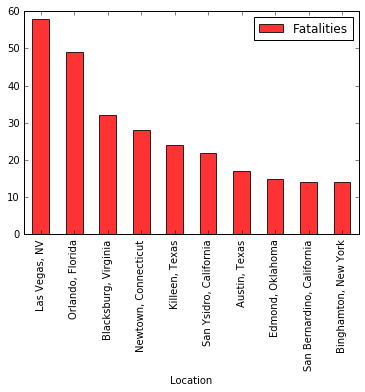

In [110]:
top_ten.plot.bar(color='red', alpha=0.8)

In [111]:
# Now to find out: Are blacks or whites more responsible for gun shootings in America?

blacks = mass_shooting['Race'].str.contains('Black').sum()

In [112]:
blacks

75

In [113]:
whites = mass_shooting['Race'].str.contains('White').sum()

In [114]:
whites

101

In [117]:
unknown = mass_shooting['Race'].str.contains('Unknown').sum()

In [118]:
unknown

38

In [119]:
whites + blacks + unknown

214

In [126]:
# Male or female perpetrators?

mass_shooting['Gender'].str.contains('M', 'Male').sum()

296

In [136]:
mass_shooting['Gender'].str.contains('Female').sum()

8

In [144]:
# it is an overwhelming verdict agains the men who perpetrate mass shootings
# Since the list is short, let us look at the women shooters

female1 = mass_shooting[mass_shooting['Gender']=='Female']

In [145]:
female1

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender
170,171,Alturas tribal shooting,"Alturas, California",2/20/2014,"Cherie Lash Rhoades, 44, opened fire at the Ce...",4,2,6,Unknown,Native American,Female
225,226,University of Alabama in Huntsville,"Huntsville, Alabama",2/12/2010,"On February 12, 2010, a 44-year old professor ...",0,3,6,No,White American or European American,Female
266,267,Goleta postal shootings,"Goleta, California",1/30/2006,"Former postal worker Jennifer Sanmarco, 44, sh...",8,0,8,Yes,white,Female
366,367,Hubbard Woods Elementary School,"Winnetka, Illinois",5/20/1988,"On May 20, 1988, a 30-year-old woman entered t...",2,7,8,Yes,White American or European American,Female
389,390,Grover Cleveland Elementary School,"San Diego, California",1/29/1979,"On January 29, 1979, a 16-year-old opened fire...",2,9,11,Yes,White American or European American,Female
